In [23]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Gurjeet
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#importing csv
df=pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,index,description,Positive,Negative,Neutral,Compound,Sentiment
0,0,0,HINDUTVA,0.000,0.0,1.000,0.0000,Neutral
1,1,1,A Software Engineer passionate about building ...,0.313,0.0,0.687,0.7494,Positive
2,2,2,Yoga sloka meditation rajinikanth illayaraja a...,0.205,0.0,0.795,0.4767,Positive
3,3,3,🇮🇳... India muslim🇮🇳\nproud to be muslim Alham...,0.237,0.0,0.763,0.4767,Positive
4,4,4,परं वैभवं नेतुमेतत् स्वराष्ट्रम्\nसमर्था भवत्व...,0.178,0.0,0.822,0.5696,Positive


In [3]:
#cheching datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   697 non-null    int64  
 1   index        697 non-null    int64  
 2   description  697 non-null    object 
 3   Positive     697 non-null    float64
 4   Negative     697 non-null    float64
 5   Neutral      697 non-null    float64
 6   Compound     697 non-null    float64
 7   Sentiment    697 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 43.7+ KB


In [4]:
#cheching the distribution of values
df.describe()

,Unnamed: 0,index,Positive,Negative,Neutral,Compound
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,477.747489,477.747489,0.120016,0.032449,0.843228,0.154765
std,288.464114,288.464114,0.193704,0.099019,0.221701,0.321260
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.930000
25%,232.000000,232.000000,0.000000,0.000000,0.718000,0.000000
50%,463.000000,463.000000,0.000000,0.000000,1.000000,0.000000
75%,724.000000,724.000000,0.225000,0.000000,1.000000,0.401900
max,998.000000,998.000000,1.000000,0.937000,1.000000,0.932500


In [5]:
#cheching null values
df.isnull().sum()

Unnamed: 0     0
index          0
description    0
Positive       0
Negative       0
Neutral        0
Compound       0
Sentiment      0
dtype: int64

In [6]:
#dropping unnecessary columns
df.drop(['Unnamed: 0','index','Positive','Negative','Neutral','Compound'],axis=1,inplace=True)
df.head()

,description,Sentiment
0,HINDUTVA,Neutral
1,A Software Engineer passionate about building ...,Positive
2,Yoga sloka meditation rajinikanth illayaraja a...,Positive
3,🇮🇳... India muslim🇮🇳\nproud to be muslim Alham...,Positive
4,परं वैभवं नेतुमेतत् स्वराष्ट्रम्\nसमर्था भवत्व...,Positive


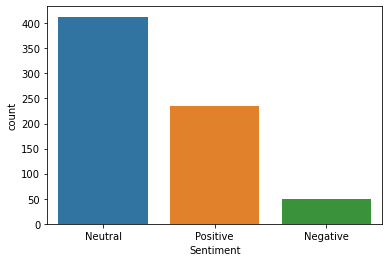

In [7]:
#checking the distribution 
sns.countplot(x='Sentiment',data=df)

In [8]:
#checking the count
df['Sentiment'].value_counts()

Neutral     413
Positive    234
Negative     50
Name: Sentiment, dtype: int64

In [9]:
#mapping the coulmns
df['Sentiment']=df['Sentiment'].map({'Neutral':0, 'Positive':1,'Negative':2})
df.head()

,description,Sentiment
0,HINDUTVA,0
1,A Software Engineer passionate about building ...,1
2,Yoga sloka meditation rajinikanth illayaraja a...,1
3,🇮🇳... India muslim🇮🇳\nproud to be muslim Alham...,1
4,परं वैभवं नेतुमेतत् स्वराष्ट्रम्\nसमर्था भवत्व...,1


In [10]:
#for removing patterns
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for word in r:
        input_text=re.sub(word,"",input_text)
    return input_text

#reoving user handles
df['clean_text']=np.vectorize(remove_pattern)(df['description'],'@[\w]*')
df.drop('description',axis=1,inplace=True)
df.head()

,Sentiment,clean_text
0,0,HINDUTVA
1,1,A Software Engineer passionate about building ...
2,1,Yoga sloka meditation rajinikanth illayaraja a...
3,1,🇮🇳... India muslim🇮🇳\nproud to be muslim Alham...
4,1,परं वैभवं नेतुमेतत् स्वराष्ट्रम्\nसमर्था भवत्व...


In [11]:
#removing special characters and symbols
df['clean_text']=df['clean_text'].str.replace('[^a-zA-Z#]'," ")
df.head()

,Sentiment,clean_text
0,0,HINDUTVA
1,1,A Software Engineer passionate about building ...
2,1,Yoga sloka meditation rajinikanth illayaraja a...
3,1,India muslim proud to be muslim Alhamd...
4,1,...


In [12]:
#removing short word
df['clean_text']=df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Sentiment,clean_text
0,0,HINDUTVA
1,1,Software Engineer passionate about building La...
2,1,Yoga sloka meditation rajinikanth illayaraja p...
3,1,India muslim proud muslim Alhamdulillah fast a...
4,1,India First Proud Hindu endorsements


In [13]:
#tokenizing the data
tokenized_tweets=df['clean_text'].apply(lambda x: x.split())
tokenized_tweets

0                                             [HINDUTVA]
1      [Software, Engineer, passionate, about, buildi...
2      [Yoga, sloka, meditation, rajinikanth, illayar...
3      [India, muslim, proud, muslim, Alhamdulillah, ...
4             [India, First, Proud, Hindu, endorsements]
                             ...                        
692                                         [Patriotism]
693    [Farmers, Family, Block, anyone, Social, Media...
694                                        [Hardworking]
695                       [Give, respect, Respect, from]
696                               [#AJMER#KRT, #TEAMKRT]
Name: clean_text, Length: 697, dtype: object

In [14]:
#stemming the data
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
tokenized_tweets=tokenized_tweets.apply(lambda x: [ps.stem(word) for word in x])
tokenized_tweets.head()

0                                           [hindutva]
1    [softwar, engin, passion, about, build, larg, ...
2    [yoga, sloka, medit, rajinikanth, illayaraja, ...
3    [india, muslim, proud, muslim, alhamdulillah, ...
4                 [india, first, proud, hindu, endors]
Name: clean_text, dtype: object

In [15]:
#converting to single sentence
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i]= " ".join(tokenized_tweets[i])

In [16]:
#commenting to original data
df['clean_text']=tokenized_tweets
df.head()

,Sentiment,clean_text
0,0,hindutva
1,1,softwar engin passion about build larg scale h...
2,1,yoga sloka medit rajinikanth illayaraja proud ...
3,1,india muslim proud muslim alhamdulillah fast a...
4,1,india first proud hindu endors


In [17]:
from wordcloud import WordCloud
wc=WordCloud()

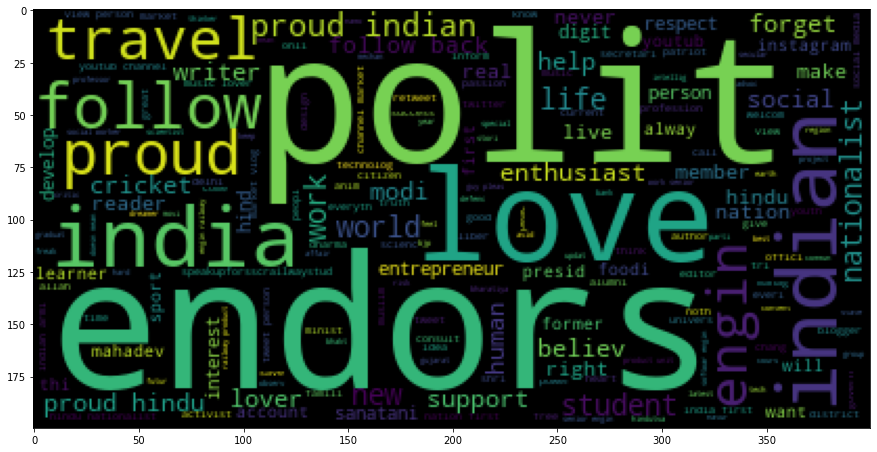

In [18]:
#visualize frequent words
allwords=" ".join([x for x in df['clean_text']])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(allwords))
plt.show()

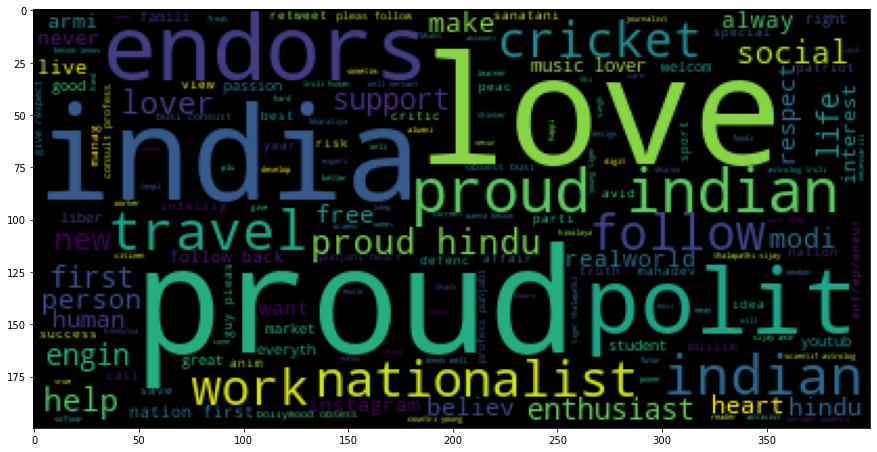

In [19]:
#visualize +ve words
pos_words=" ".join([x for x in df['clean_text'][df['Sentiment']==1]])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(pos_words))
plt.show()

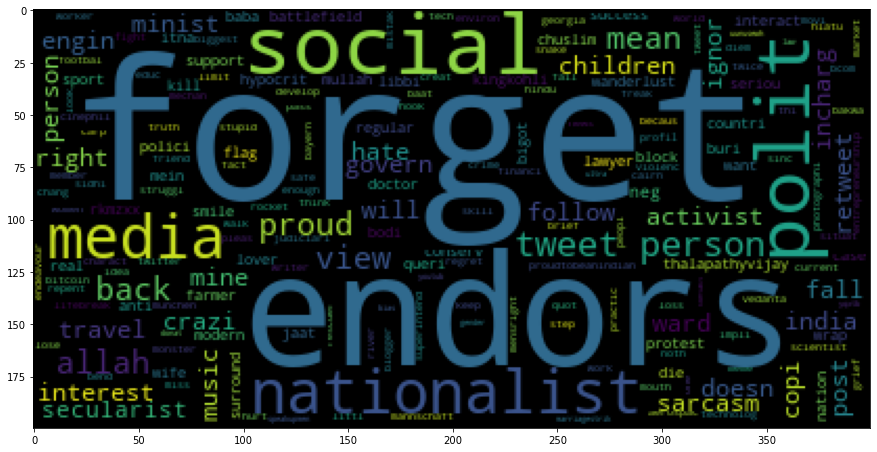

In [20]:
#visualize -ve words
neg_words=" ".join([x for x in df['clean_text'][df['Sentiment']==2]])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(neg_words))
plt.show()

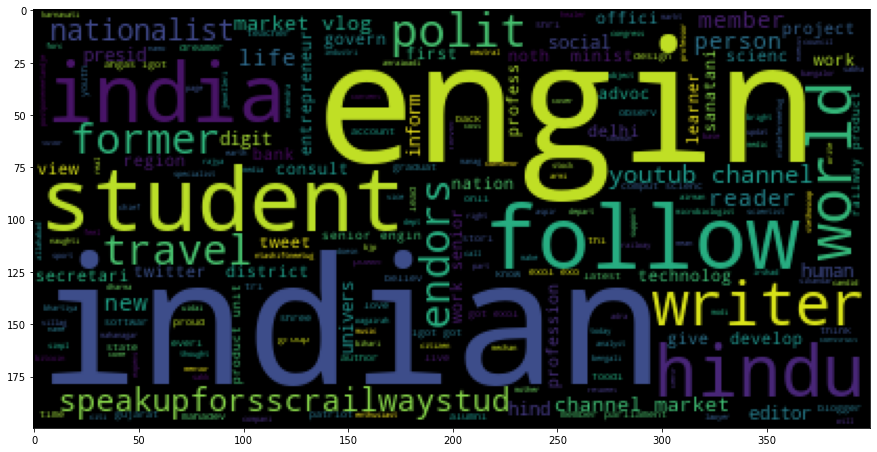

In [21]:
#visualize neutral words
neutral_words=" ".join([x for x in df['clean_text'][df['Sentiment']==0]])

plt.figure(figsize=(15,8))
plt.imshow(wc.generate(neutral_words))
plt.show()

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(min_df=2,max_df=0.90,max_features=1000,stop_words='english')

#Saving the Count Vector as tranform.pkl file 
#which will be used to convert text into count vector
pickle.dump(cv,open('transform.pkl','wb'))

X=cv.fit_transform(df['clean_text'])

#Saving the vocabulary in form of words
words = cv.get_feature_names()
pickle.dump(words,open('vocabulary.pkl','wb'))

y=df['Sentiment']

In [26]:
## Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.10)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [28]:
# Fitting Multinomial Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

#Training accuracy
print(nb.score(X_train,y_train))

y_pred_nb=nb.predict(X_test)

#Testing accuracy
print(accuracy_score(y_test,y_pred_nb))

0.9138755980861244
0.8142857142857143


In [29]:
# Fitting LogisticRegression to the Training set
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

#Training accuracy
print(lr.score(X_train,y_train))

y_pred_lr=lr.predict(X_test)

#Testing accuracy
print(accuracy_score(y_test,y_pred_lr))

0.9393939393939394
0.7285714285714285


In [30]:
# Fitting SVC to the Training set
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

#Training accuracy
print(svc.score(X_train,y_train))

y_pred_svc=svc.predict(X_test)

#Testing accuracy
print(accuracy_score(y_test,y_pred_svc))

0.9409888357256778
0.7


In [32]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Training accuracy
print(rf.score(X_train,y_train))

y_pred_rf=rf.predict(X_test)

#Testing accuracy
print(accuracy_score(y_test,y_pred_rf))

0.9920255183413078
0.7714285714285715


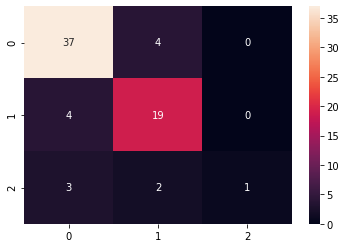

In [33]:
#plotting confusion matrix with Multinomial NB model
cm=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm, annot=True)

In [34]:
#checking classification_report with Multinomial NB model
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.76      0.83      0.79        23
           2       1.00      0.17      0.29         6

    accuracy                           0.81        70
   macro avg       0.87      0.63      0.65        70
weighted avg       0.83      0.81      0.79        70



In [35]:
#dumping the model
pickle.dump(nb, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)